In [25]:
import os
import pandas as pd
from datetime import datetime
base_dir = "C://DATA//train//49_kaggle//KaggleFun//Sales//DATA"
cat = pd.read_csv(os.path.join(base_dir, "item_categories.csv"))
item = pd.read_csv(os.path.join(base_dir,'items.csv'))
sales = pd.read_csv(os.path.join(base_dir, 'sales_train.csv'))
shops = pd.read_csv(os.path.join(base_dir, 'shops.csv'))
cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [58]:
len(sales)

2882335

In [26]:
print(len(item))
item.head()

22170


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [27]:
print(len(shops))
shops.head()

60


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [28]:
sales.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [29]:
# we will be predicting 33 instead 
sales = sales[sales["date_block_num"] < 33]

In [30]:
sales.date=sales.date.apply(lambda x:datetime.strptime(x, '%d.%m.%Y'))
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])["date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})
monthly_sales.head()

In [43]:
 
monthly_sales.head()

date_block_num  shop_id  item_id
0               0        32         6.0
                         33         3.0
                         35         1.0
                         43         1.0
                         51         2.0
Name: item_cnt_day, dtype: float64

In [54]:
monthly_sales[0].index.unique()

MultiIndex([( 0,    32),
            ( 0,    33),
            ( 0,    35),
            ( 0,    43),
            ( 0,    51),
            ( 0,    61),
            ( 0,    75),
            ( 0,    88),
            ( 0,    95),
            ( 0,    96),
            ...
            (59, 22014),
            (59, 22015),
            (59, 22079),
            (59, 22087),
            (59, 22088),
            (59, 22092),
            (59, 22130),
            (59, 22134),
            (59, 22151),
            (59, 22154)],
           names=['shop_id', 'item_id'], length=63224)

In [47]:
for i in range(0,33):
    monthly_sales[i,0,32]

6.0

In [31]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
print(len(ts))
ts.head()

33


date_block_num
0    131479.0
1    128090.0
2    147142.0
3    107190.0
4    106970.0
Name: item_cnt_day, dtype: float64

'\nFor multiplicative, the final answer is trend * seasonality * y_pred\n'

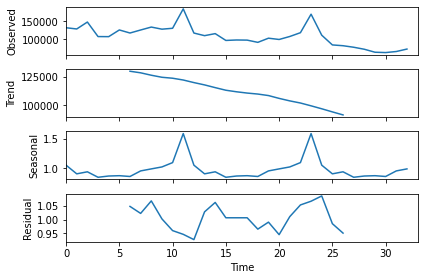

In [32]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()
plt.show

"""
For multiplicative, the final answer is trend * seasonality * y_pred
"""

In [33]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
print("Test Stat: {:02f}".format(dftest[0]))
print("p_value: {:02f}".format(dftest[1]))
print("Lags: {:02f}".format(dftest[2]))
print("Observations: {:02f}".format(dftest[3]))
for key,value in dftest[4].items():
    print("Crit {}: {:02f}".format(key, value))
    
"""
test stat > all crits, null hypo not rejected, data is not stationary
"""

Dickey-Fuller Test:
Test Stat: -2.431404
p_value: 0.133068
Lags: 0.000000
Observations: 32.000000
Crit 1%: -3.653520
Crit 5%: -2.957219
Crit 10%: -2.617588


'\ntest stat > all crits, null hypo not rejected, data is not stationary\n'

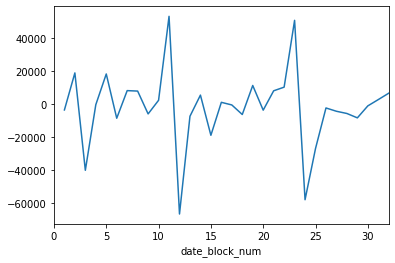

In [40]:
# we need to detrend the data first

ts_dt = ts.diff(1)
ts_dt.head()
ts_dt.plot()

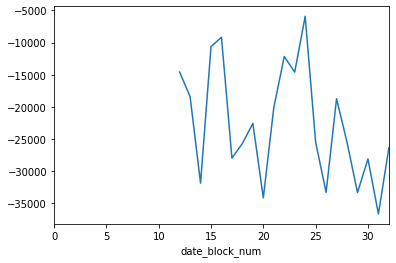

In [41]:
# from the previous graph, it looks like seasonality is per 12 months
ts_ds = ts.diff(12)
ts_ds.plot()